In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

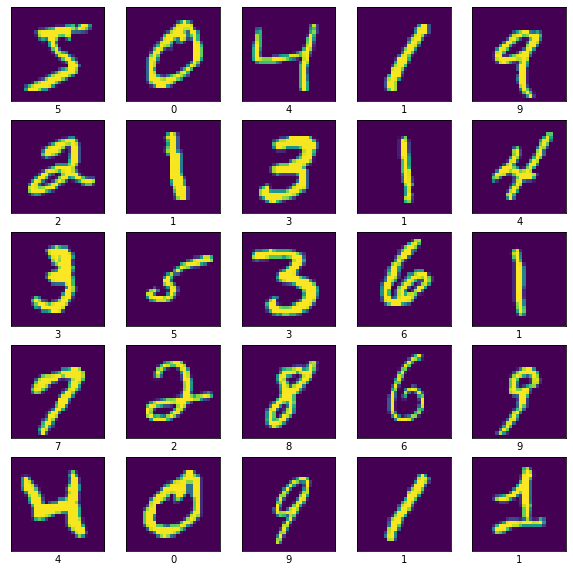

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i]), #cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train.shape
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1))),
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(64, (3, 3), activation='relu')),
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 51s 857us/sample - loss: 1.5803 - accuracy: 0.8841 - val_loss: 1.4850 - val_accuracy: 0.9765
Epoch 2/10
60000/60000 [==============================] - 51s 846us/sample - loss: 1.4839 - accuracy: 0.9779 - val_loss: 1.4870 - val_accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 54s 894us/sample - loss: 1.4798 - accuracy: 0.9815 - val_loss: 1.4811 - val_accuracy: 0.9801
Epoch 4/10
60000/60000 [==============================] - 55s 912us/sample - loss: 1.4767 - accuracy: 0.9845 - val_loss: 1.4751 - val_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 55s 925us/sample - loss: 1.4747 - accuracy: 0.9865 - val_loss: 1.4767 - val_accuracy: 0.9844
Epoch 6/10
60000/60000 [==============================] - 56s 931us/sample - loss: 1.4743 - accuracy: 0.9869 - val_loss: 1.4727 - val_accuracy: 0.9883
Epoch 7/10
60000/60000 [====================

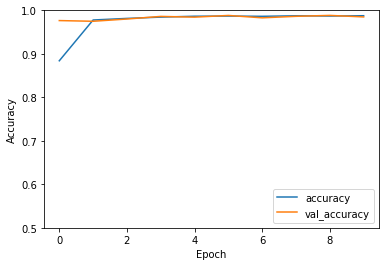

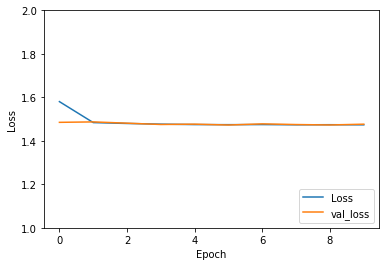

10000/1 - 2s - loss: 1.4689 - accuracy: 0.9849


In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1,2])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [12]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4765734493255616, 0.9849]

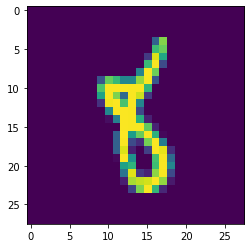

In [13]:
import matplotlib.pyplot as plt
x_test = x_test.reshape(x_test.shape[0], 28, 28)
plt.imshow(x_test[5678])
plt.show()

In [14]:
x_test[5678].shape

(28, 28)

In [15]:
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
predictions = model.predict(x_test)
print(predictions[5678])
np.argmax(predictions[5678])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2041286e-35 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]


8

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
pred=[]
for j in range(len(predictions)):
   pred.append(np.argmax(predictions[j]))

In [18]:
pred

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 5,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 8,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [19]:
import sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[ 975,    1,    0,    0,    0,    0,    0,    1,    3,    0],
       [   0, 1128,    1,    1,    0,    0,    1,    2,    1,    1],
       [   0,    0, 1030,    0,    0,    0,    0,    2,    0,    0],
       [   0,    0,    4,  983,    0,   14,    0,    3,    6,    0],
       [   1,    0,    2,    0,  966,    0,    1,    2,    3,    7],
       [   2,    0,    0,    2,    0,  871,    4,    0,   10,    3],
       [   2,    3,    1,    0,    1,    2,  947,    0,    2,    0],
       [   0,    1,   11,    1,    0,    0,    0, 1014,    0,    1],
       [   0,    0,    2,    0,    0,    0,    0,    0,  971,    1],
       [   4,    2,    0,    3,    1,    4,    0,   10,   21,  964]],
      dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.97      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.95      1.00      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [21]:
print('Accuracy:', sklearn.metrics.accuracy_score(y_test,pred))

print('F1 score:',sklearn.metrics.f1_score(y_test,pred,
                            average='weighted'))

print( 'Recall:',sklearn.metrics.recall_score(y_test,pred,
                              average='weighted'))

print('Precision:',sklearn.metrics.precision_score(y_test,pred,
                                    average='weighted'))

Accuracy: 0.9849
F1 score: 0.9848962127607727
Recall: 0.9849
Precision: 0.9850827154817282
